#**HOUSE PRICE PREDICTION**

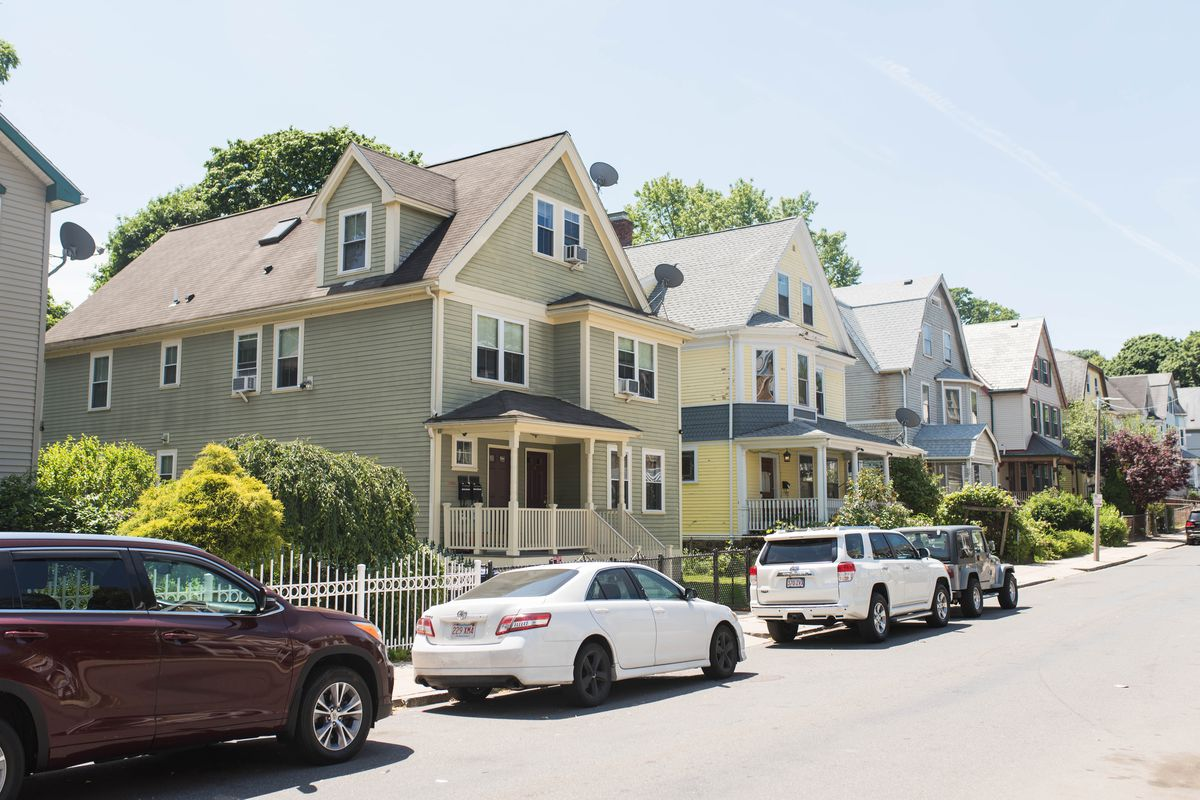

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.

**IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score


In [2]:
df=pd.read_csv('/content/drive/MyDrive/COGNORISE/TASK 2 HOUSE PRICE PREDICTION/data.csv')
df

date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]

**DATA PREPROCESSING**

In [3]:
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [4]:
df.tail()

date          price  bedrooms  bathrooms  sqft_living  \
4595  2014-07-09 00:00:00  308166.666667       3.0       1.75         1510   
4596  2014-07-09 00:00:00  534333.333333       3.0       2.50         1460   
4597  2014-07-09 00:00:00  416904.166667       3.0       2.50         3010   
4598  2014-07-10 00:00:00  203400.000000       4.0       2.00         2090   
4599  2014-07-10 00:00:00  220600.000000       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated             street       city  \
4595              0      1954          1979     501 N 143rd St    Seattle   
4596              0      1983          2009   14855 SE 10th Pl   Bellevue   
4597              0      2009             0   759 Ilwaco Pl NE     Renton   
4598           1020      1974             0  5148 S Creston St    Seattle   
4599              0      1990             0  18717 SE 258th St  Covington   

      statezip country  
4595  WA 98133     USA  
4596  WA 98007     USA  
4597  WA 98059     USA  
4598  WA 98178     USA  
4599  WA 98042     USA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [7]:
df.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

In [8]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [9]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [10]:
df.shape

(4600, 18)

In [11]:
#count of duplicated rows
df.duplicated().sum()

0

In [12]:
df['price'].value_counts()

price
0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: count, Length: 1741, dtype: int64

In [13]:
#to get the value counts of each column
for i in df:
  value=df[i].value_counts()
  print(value)
  print('_'*1000)

date
2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-07-04 00:00:00      2
2014-05-11 00:00:00      2
2014-05-17 00:00:00      1
Name: count, Length: 70, dtype: int64
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [14]:
df['date']=df['date'].str.replace('00:00:00','')
df['statezip']=df['statezip'].str.replace('WA','')

In [15]:
df.loc[df['price']==0.0,'price']=np.NaN

In [16]:
df.loc[df['bedrooms']==0.0,'bedrooms']=np.NaN

In [17]:
df.loc[df['bathrooms']==0.0,'bathrooms']=np.NaN


In [18]:
df.loc[df['sqft_basement']==0.0,'sqft_basement']=np.NaN

In [19]:
df.loc[df['yr_renovated']==0.0,'yr_renovated']=np.NaN

In [20]:
df.isna().sum()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [21]:
#dropping unwanted columns
df.drop(['sqft_basement','yr_renovated','country','street','date'],axis=1,inplace=True)

In [22]:
#filling fissing values

df['price']=df['price'].fillna(df['price'].median())
df['bathrooms']=df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms']=df['bedrooms'].fillna(df['bedrooms'].median())

In [23]:
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
sqft_above     0
yr_built       0
city           0
statezip       0
dtype: int64

In [24]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['city']=lab.fit_transform(df['city'])

In [25]:
#converting the object datatype into numerical

df['statezip']=df['statezip'].astype(float)

In [26]:
df.dtypes

price          float64
bedrooms       float64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront       int64
view             int64
condition        int64
sqft_above       int64
yr_built         int64
city             int64
statezip       float64
dtype: object

**VISUALIZATION**

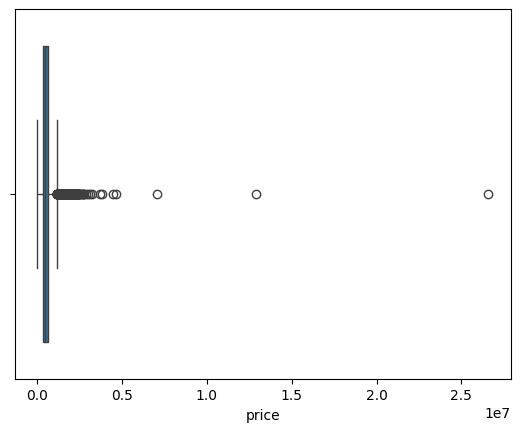

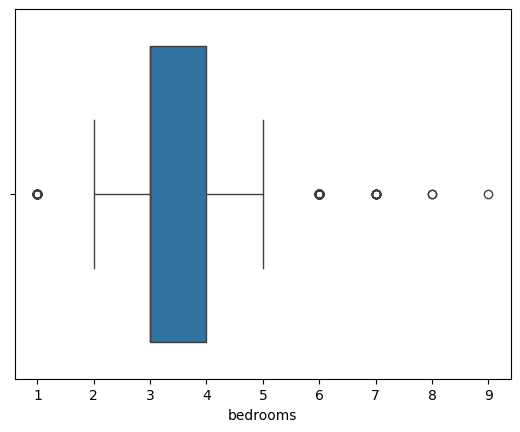

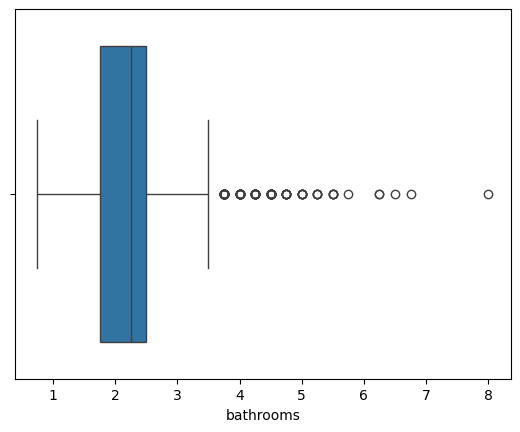

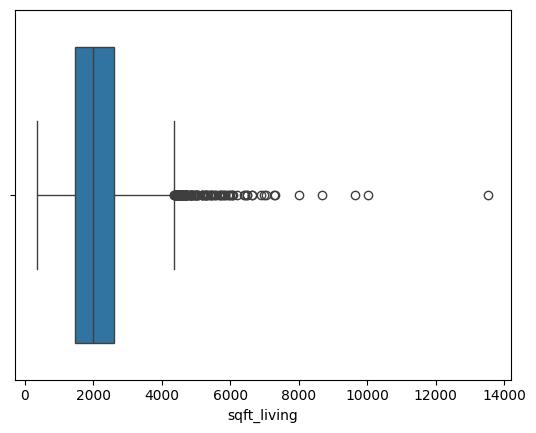

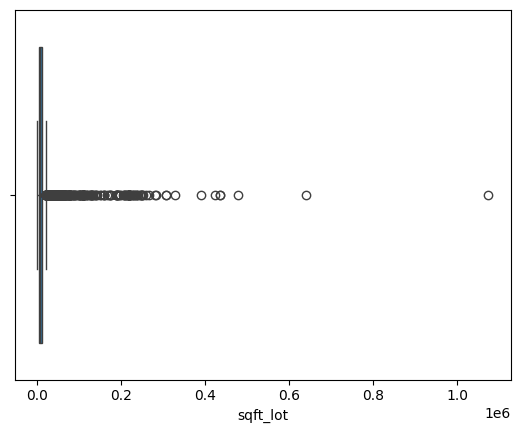

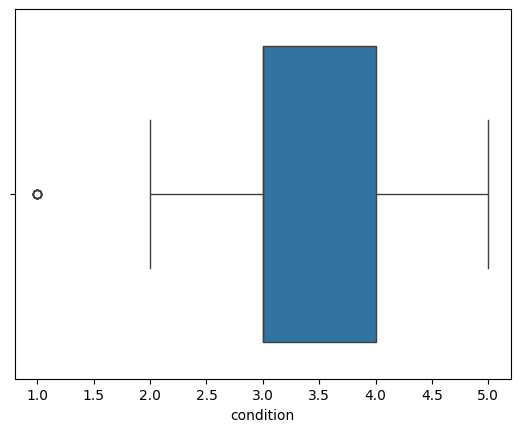

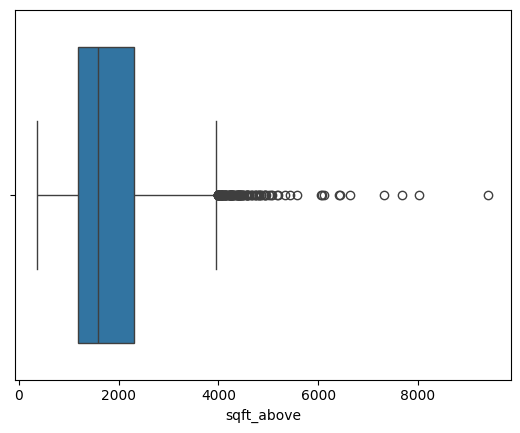

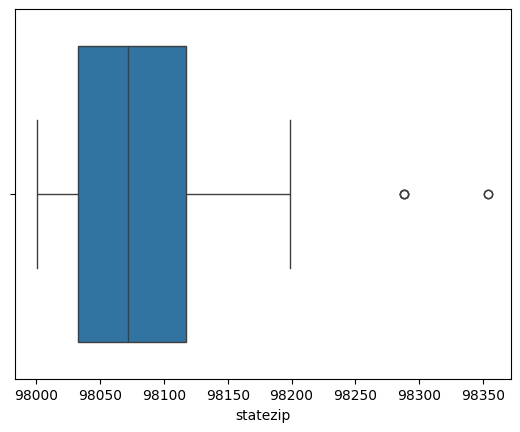

In [27]:
#boxplot

for i in ['price','bedrooms','bathrooms','sqft_living','sqft_lot','condition','sqft_above','statezip']:
  sns.boxplot(x=i,data=df)
  plt.show()

In [28]:
#outliers treating

def wisker(col):
  q1=col.quantile(0.25)
  q3=col.quantile(0.75)
  IQR=q3-q1
  LW=q1-1.5*IQR  #lower wisker
  UW=q3+1.5*IQR  #upper wisker
  return LW,UW

In [29]:
for i in ['price','bedrooms','bathrooms','sqft_living','sqft_lot','condition','sqft_above','statezip']:
  LW,UW=wisker(df[i])
  df[i]=np.where(df[i]<LW,LW,df[i])
  df[i]=np.where(df[i]>UW,UW,df[i])

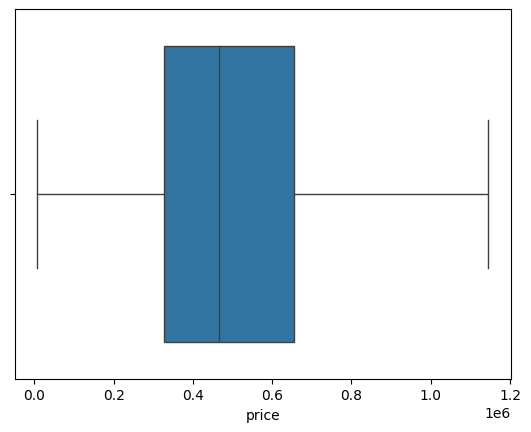

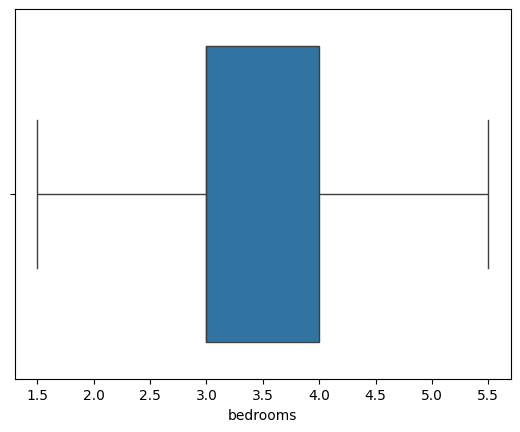

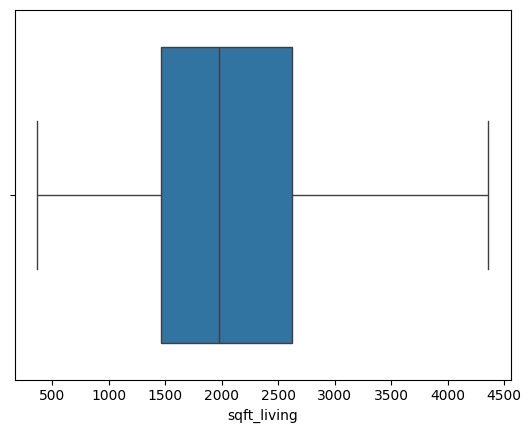

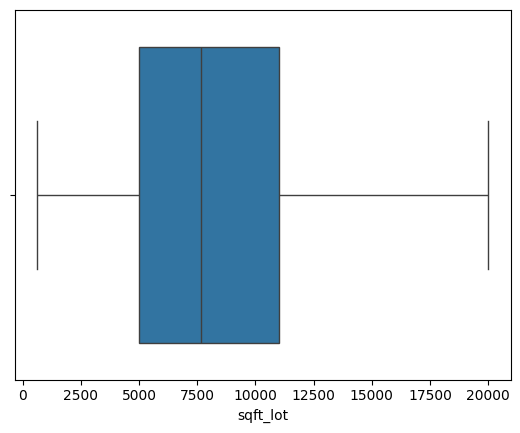

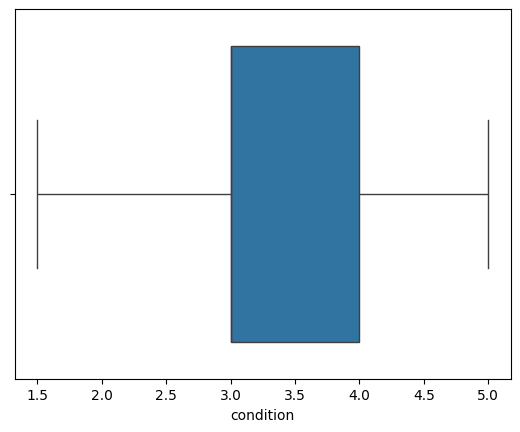

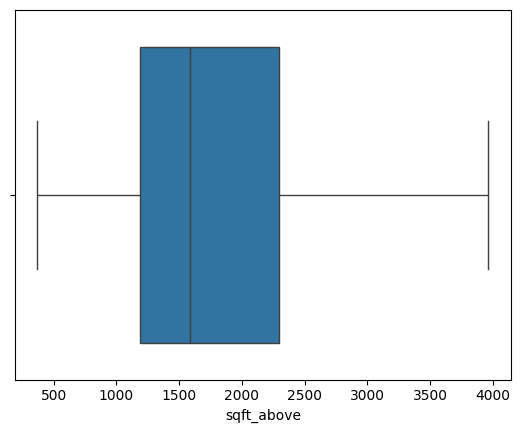

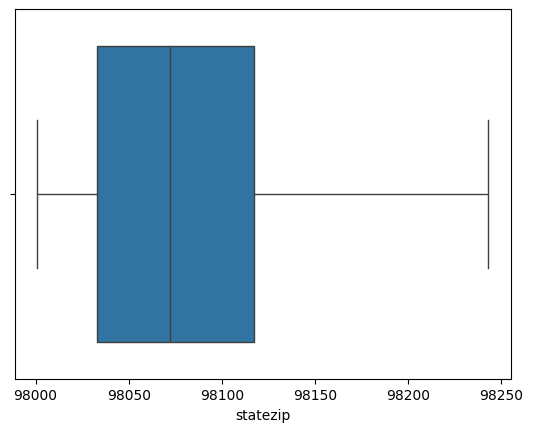

In [30]:
for i in ['price','bedrooms','sqft_living','sqft_lot','condition','sqft_above','statezip']:
  sns.boxplot(x=i,data=df)
  plt.show()

Text(0.5, 1.0, 'Property View Distribution')

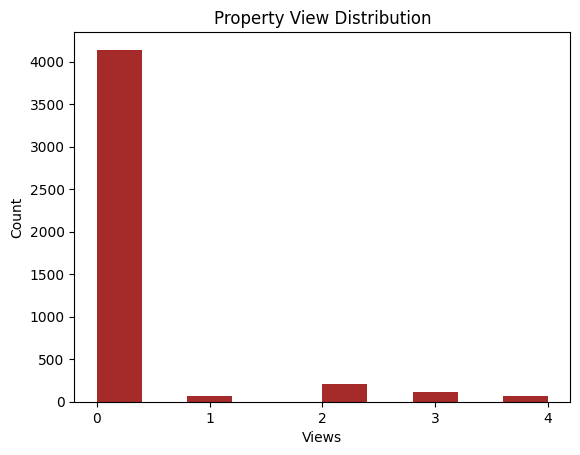

In [31]:
#Exploring Property view distribution

df['view'].value_counts()
df['view'].plot(kind='hist',color='brown')
plt.xticks([0,1,2,3,4])
plt.xlabel('Views')
plt.ylabel('Count')
plt.title('Property View Distribution')

<Figure size 1000x700 with 0 Axes>

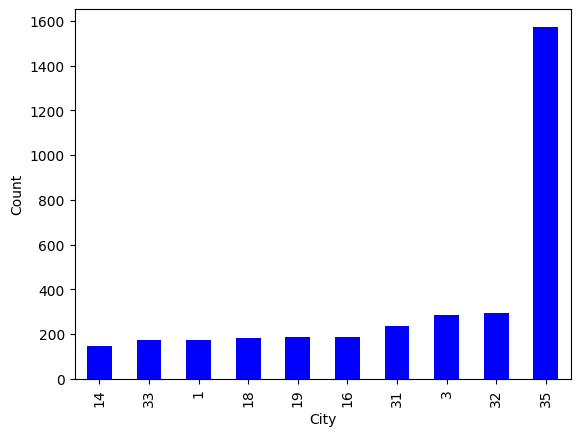

<Figure size 1000x700 with 0 Axes>

In [32]:
#Top 10 cities with highest view counts

df['city'].value_counts().sort_values().tail(10).plot(kind='bar',color='blue')
plt.xlabel('City')
plt.ylabel('Count')
plt.figure(figsize=(10,7))

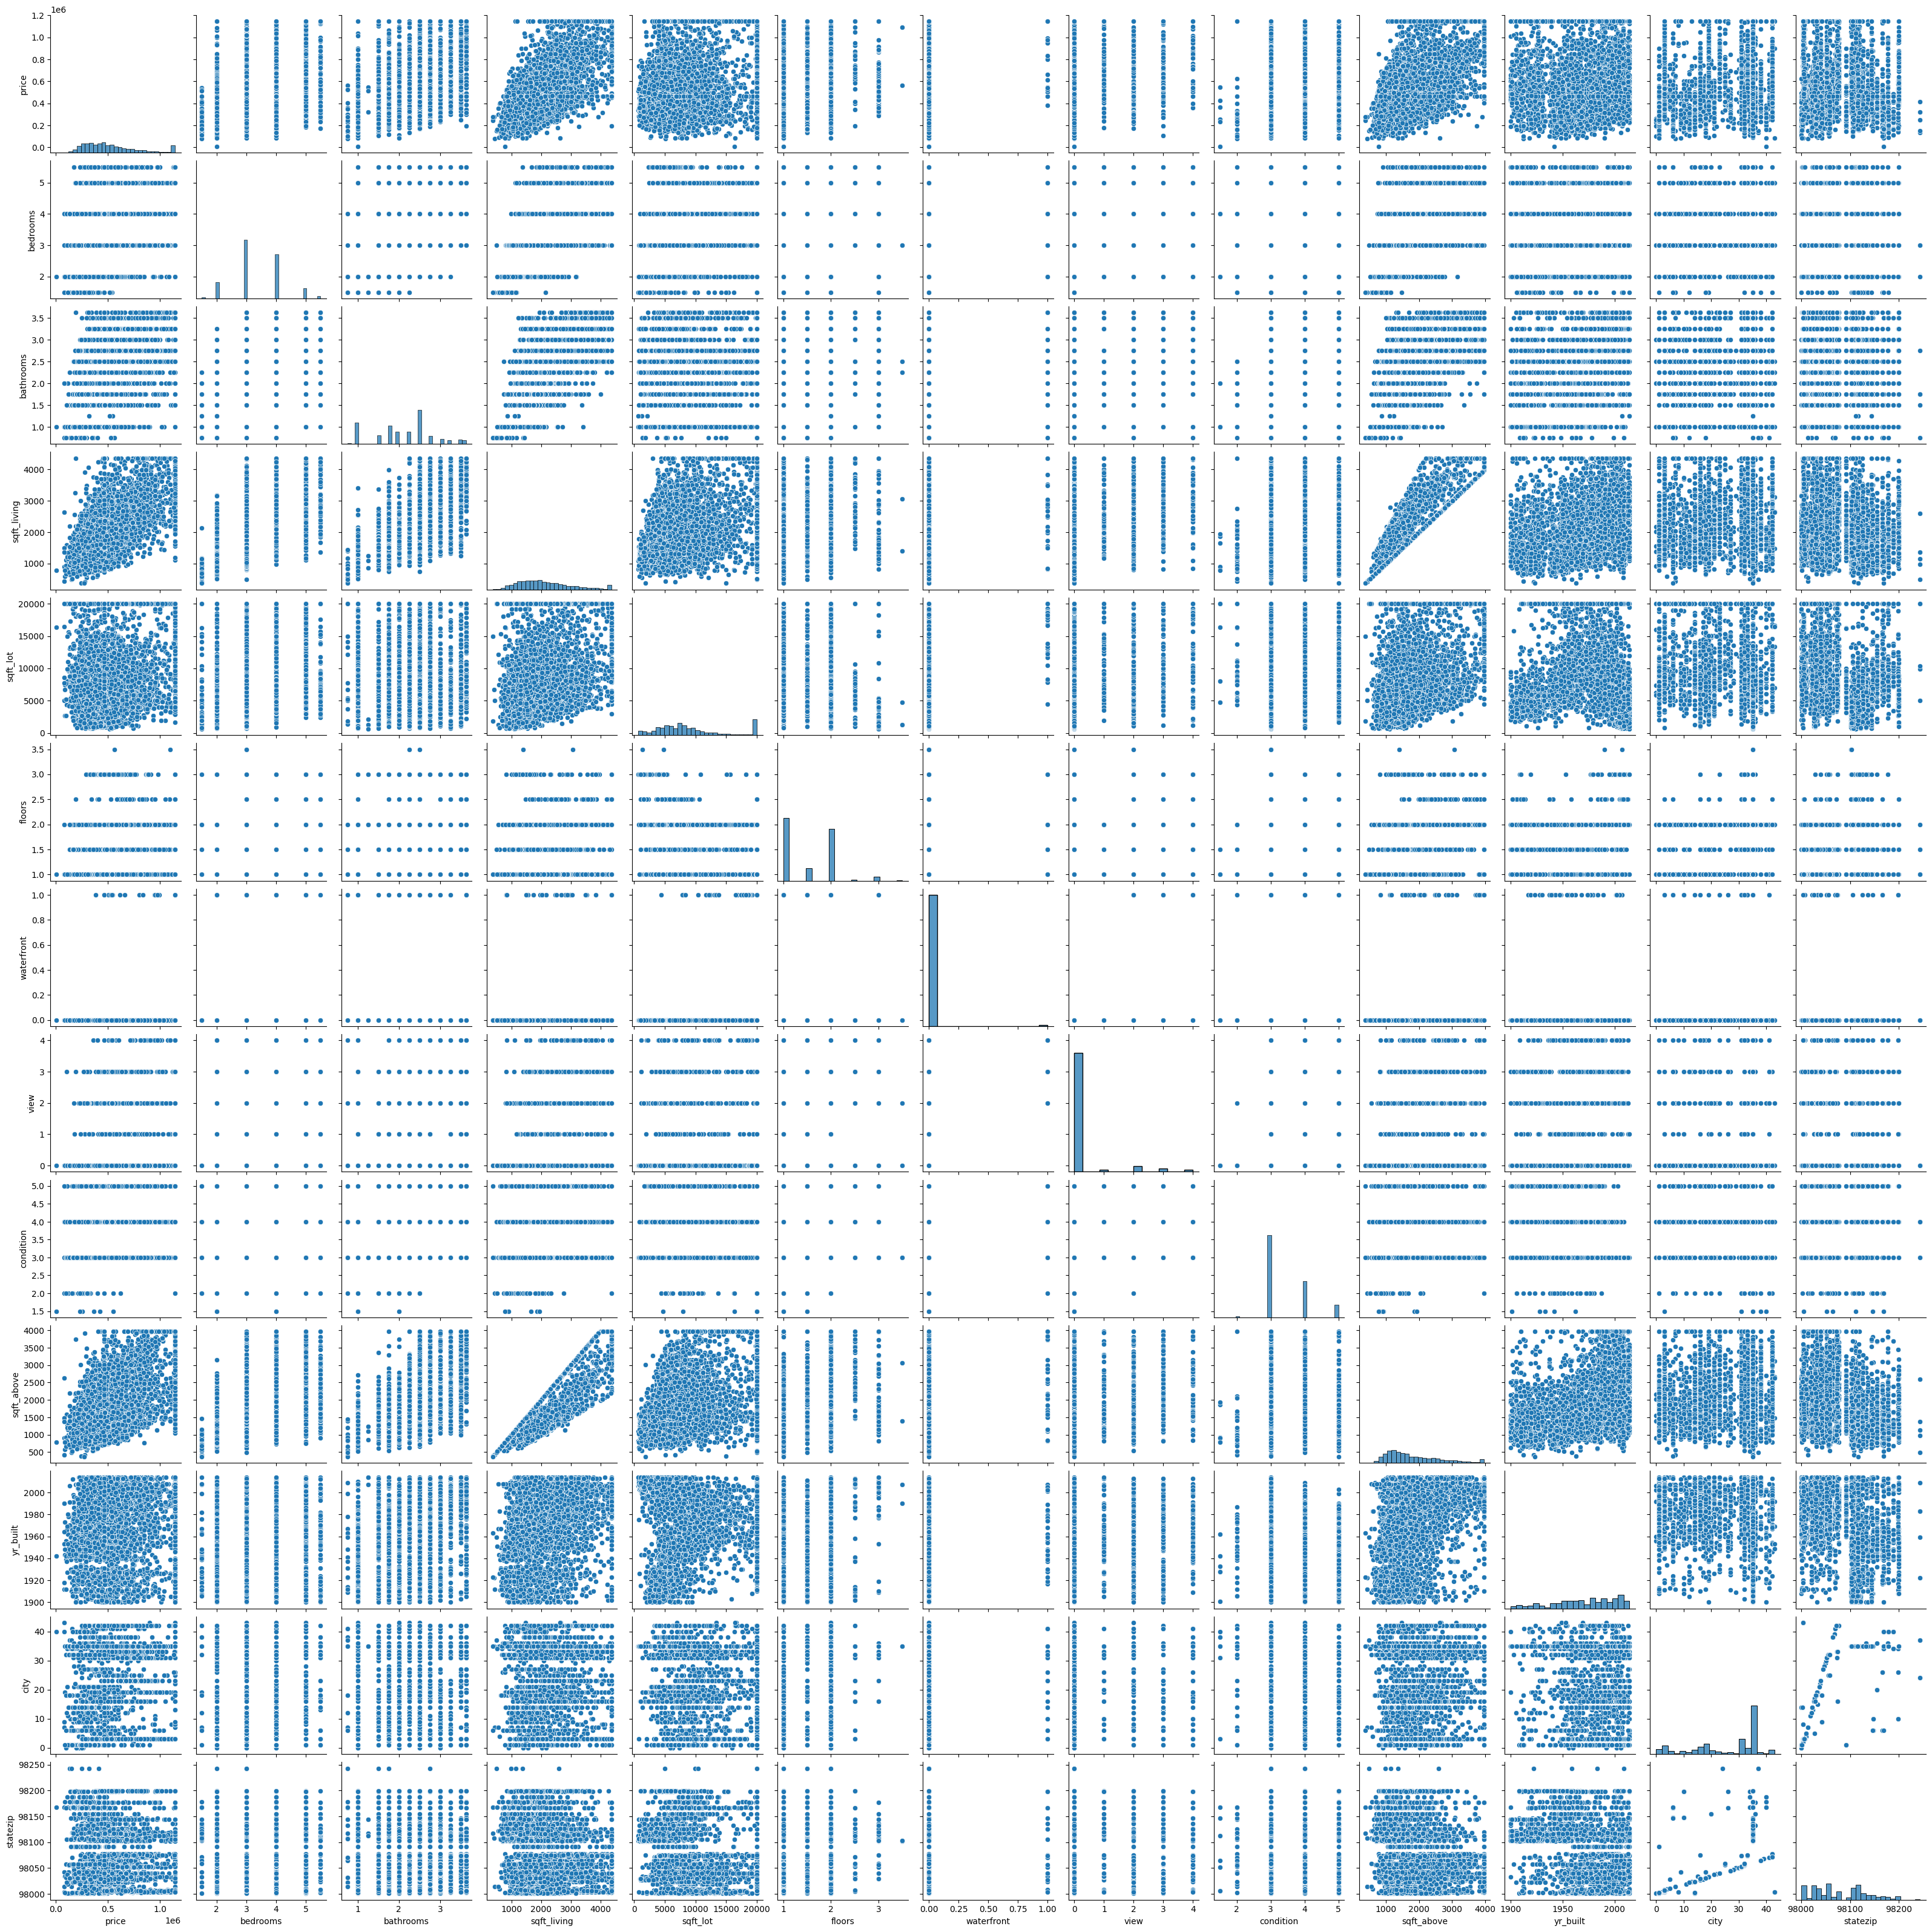

In [33]:
sns.pairplot(df)

**SSEPERATING X AND y**

In [34]:
#split the data into independent and dependent variable
#X==> independent variable
#y===>dependent variable

X=df.drop(['price'],axis=1)
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50       1340.0    7912.0     1.5           0     0   
1          5.0       2.50       3650.0    9050.0     2.0           0     4   
2          3.0       2.00       1930.0   11947.0     1.0           0     0   
3          3.0       2.25       2000.0    8030.0     1.0           0     0   
4          4.0       2.50       1940.0   10500.0     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75       1510.0    6360.0     1.0           0     0   
4596       3.0       2.50       1460.0    7573.0     2.0           0     0   
4597       3.0       2.50       3010.0    7014.0     2.0           0     0   
4598       4.0       2.00       2090.0    6630.0     1.0           0     0   
4599       3.0       2.50       1490.0    8102.0     2.0           0     0   

      condition  sqft_above  yr_built  city  statezip  
0           3.0      1340.0      1955    36   98133.0  
1           5.0      3370.0      1921    35   98119.0  
2           4.0      1930.0      1966    18   98042.0  
3           4.0      1000.0      1963     3   98008.0  
4           4.0      1140.0      1976    31   98052.0  
...         ...         ...       ...   ...       ...  
4595        4.0      1510.0      1954    35   98133.0  
4596        3.0      1460.0      1983     3   98007.0  
4597        3.0      3010.0      2009    32   98059.0  
4598        3.0      1070.0      1974    35   98178.0  
4599        4.0      1490.0      1990     9   98042.0  

[4600 rows x 12 columns]

In [35]:
y=df['price']
y

0       3.130000e+05
1       1.145168e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

**SPLITTING DATA FOR TAINING AND TESTING**

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [37]:
X_train.shape,y_train.shape

((3220, 12), (3220,))

In [38]:
X_test.shape,y_test.shape

((1380, 12), (1380,))

**MODEL CREATION**

In [39]:
forest=RandomForestRegressor(random_state=42)
linear=LinearRegression()
tree=DecisionTreeRegressor(random_state=42)
gb_regressor= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

**PERFORMANCE EVALUATION**

RandomForestRegressor(random_state=42)
[446636.3        386116.90151515 907072.33999997 ... 267338.62777777
 332830.70666666 659539.92214285]
ABSOLUTE PERCENTAGE ERROR : 0.21362454674726583
R2 Score : 0.679683296272066


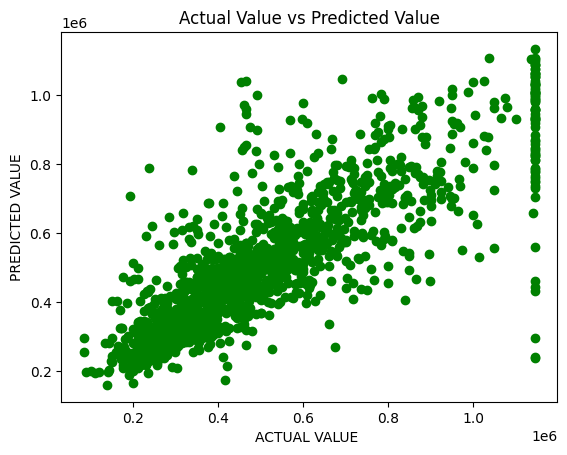

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

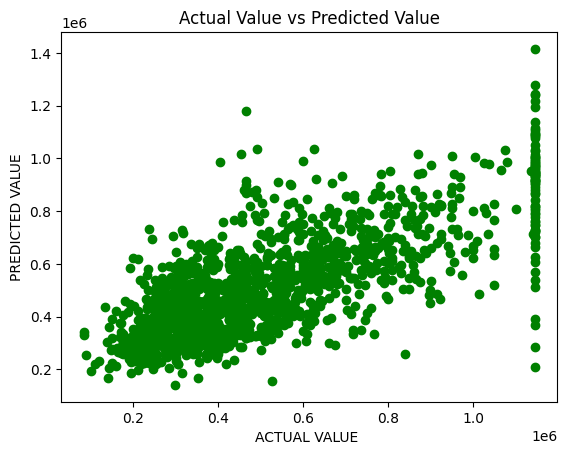

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

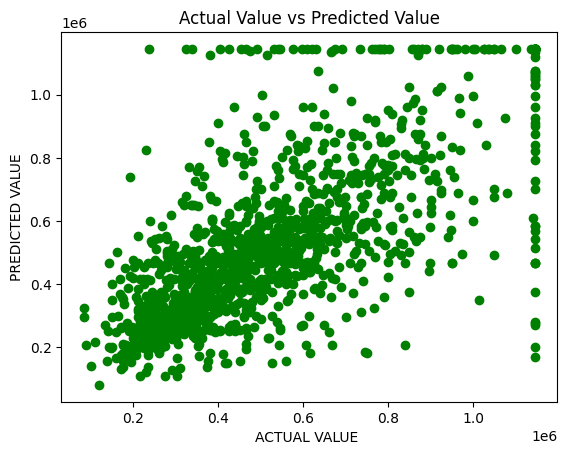

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

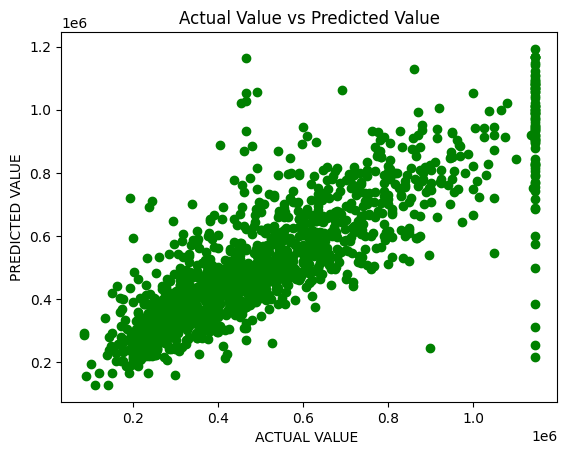

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [40]:
model=[forest,linear,tree,gb_regressor]
for i in model:
  i.fit(X_train,y_train)
  print(i)
  y_pred=i.predict(X_test)
  print(y_pred)
  print('ABSOLUTE PERCENTAGE ERROR :',mean_absolute_percentage_error(y_test,y_pred))
  print('R2 Score :',r2_score(y_test,y_pred))
  plt.scatter(y_test,y_pred,color='g')
  plt.xlabel("ACTUAL VALUE ")
  plt.ylabel("PREDICTED VALUE")
  plt.title("Actual Value vs Predicted Value")
  plt.show()
  print('_'*1000)
